In [ ]:
! pip install ONE-api
! pip install ibllib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.3/292.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 11.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━

In [ ]:
!git clone -b imbizo https://github.com/int-brain-lab/paper-brain-wide-map.git
%cd /content/paper-brain-wide-map
!pip install -e

Cloning into 'paper-brain-wide-map'...
remote: Enumerating objects: 1968, done.
remote: Counting objects: 100% (1075/1075), done.
remote: Compressing objects: 100% (389/389), done.
remote: Total 1968 (delta 811), reused 866 (delta 683), pack-reused 893
Receiving objects: 100% (1968/1968), 4.97 MiB | 6.96 MiB/s, done.
Resolving deltas: 100% (1246/1246), done.
/content/paper-brain-wide-map

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-e option requires 1 argument


In [ ]:




# Instanciate the ONE cache
from pathlib import Path
ibl_cache = Path.home() / 'Downloads' / 'IBL_Cache'
ibl_cache.mkdir(exist_ok=True, parents=True)

# Setup the ONE API
from one.api import ONE
ONE.setup()

Param ALYX_URL, current value is ["https://openalyx.internationalbrainlab.org"]:
Param ALYX_LOGIN, current value is ["intbrainlab"]:
Param HTTP_DATA_SERVER, current value is ["https://ibl.flatironinstitute.org/public"]:
Param HTTP_DATA_SERVER_LOGIN, current value is ["None"]:
Enter the FlatIron HTTP password for None (leave empty to keep current): ··········
Enter the location of the download cache, current value is ["/root/Downloads/ONE/openalyx.internationalbrainlab.org"]:
Would you like to set this URL as the default one? [Y/n]
Are the above settings correct? [Y/n]
ONE Parameter files location: /root/.one


IBLParams(CLIENT_MAP={'openalyx.internationalbrainlab.org': '/root/Downloads/ONE/openalyx.internationalbrainlab.org'}, DEFAULT='openalyx.internationalbrainlab.org')

In [ ]:
from one.api import ONE
from brainbox.population.decode import get_spike_counts_in_bins
from brainbox.io.one import SpikeSortingLoader, SessionLoader
from brainbox.ephys_plots import plot_brain_regions
from brainbox.behavior.wheel import velocity
from brainbox.task.trials import get_event_aligned_raster, get_psth
from ibllib.atlas import AllenAtlas
from brainwidemap import bwm_query
from brainwidemap.imbizo.encoding_functions import get_choice_time_shuffle
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

one = ONE(base_url='https://openalyx.internationalbrainlab.org', \
          password='international', silent=True, cache_dir=ibl_cache)

ba = AllenAtlas()

/usr/local/lib/python3.10/dist-packages/ibllib/atlas/__init__.py:205: DeprecationWarning: ibllib.atlas is deprecated. Please install iblatlas using "pip install iblatlas" and use this module instead
  warnings.warn('ibllib.atlas is deprecated. Please install iblatlas using "pip install iblatlas" and use '
/usr/local/lib/python3.10/dist-packages/ibllib/atlas/atlas.py:13: DeprecationWarning: ibllib.atlas.atlas.AllenAtlas is deprecated. Use iblatlas.atlas.AllenAtlas instead
  warnings.warn(warning_text, DeprecationWarning)


Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/average_template_25.nrrd Bytes: 32998960


100%|██████████| 31.470260620117188/31.470260620117188 [00:03<00:00,  9.71it/s]


Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/annotation_25.nrrd Bytes: 4035363


100%|██████████| 3.848422050476074/3.848422050476074 [00:00<00:00,  5.61it/s]


In [ ]:
import pandas as pd

Place to search for region acronym https://search.brain-map.org/search/index.html?query=posterior%20parietal%20cortex&fa=false&e_sp=t&e_ag=t&e_tr=t&e_fa=t

In [ ]:
acronym = 'CENT2'
insertions = one.search_insertions(atlas_acronym=acronym, query_type='remote')

In [ ]:
#sessions = one.search(atlas_acronym=acronym, query_type='remote')

In [ ]:
#len(sessions)

154

In [ ]:
# one = ONE()
# eid = 'f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad'
# trials = one.load_object(eid, 'trials', collection='alf')

In [ ]:
# trials.to_df()

,goCueTrigger_times,stimOff_times,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,probabilityLeft,feedback_times,feedbackType,rewardVolume,firstMovement_times,intervals_0,intervals_1
0,101.055802,102.437889,101.056593,101.373102,-1.0,101.154650,NaN,1.0000,0.5,101.373228,1.0,1.5,101.147532,100.303602,102.937904
1,104.871307,106.221143,104.872178,105.150709,-1.0,104.871179,NaN,1.0000,0.5,105.150817,1.0,1.5,104.834532,103.632902,106.721217
2,108.888023,110.471118,108.888777,109.403725,-1.0,108.887877,NaN,0.0625,0.5,109.403825,1.0,1.5,109.276532,107.473218,110.971232
3,113.804633,115.121053,113.805352,114.048533,1.0,113.804518,0.125,NaN,0.5,114.048627,1.0,1.5,113.850532,111.664932,115.621135
4,118.454620,119.720960,118.455587,118.658219,1.0,118.454420,0.250,NaN,0.5,118.658333,1.0,1.5,118.557532,116.325033,120.221012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,3425.311001,3428.227476,3425.312235,3426.146098,1.0,3425.310901,NaN,0.2500,0.2,3426.147218,-1.0,0.0,3425.984532,3424.278005,3428.727490
554,3430.027485,3433.177348,3430.028430,3431.107986,1.0,3430.027363,NaN,1.0000,0.2,3431.109088,-1.0,0.0,3430.877532,3429.475385,3433.677391
555,3435.143891,3445.593540,3435.144651,3444.529812,-1.0,3435.143785,NaN,1.0000,0.2,3444.529913,1.0,1.5,3444.369532,3434.426890,3446.093617
556,3448.760614,3450.310201,3448.761423,3449.239613,-1.0,3448.760423,NaN,0.2500,0.2,3449.239708,1.0,1.5,3449.022532,3446.821917,3450.810313


In [ ]:
#sessions = one.search(atlas_acronym=acronym, query_type='remote')

#spike_loader = SpikeSortingLoader(eid=eid, one=one, pname=pname)

# from brainbox.io.one import SpikeSortingLoader
# # import ONE and instantiate
# from one.api import ONE
# one = ONE()
# # define pid
# pid = '695476f6-4c14-4a2f-b658-948514629079'

# # instantiate with a pid
# spike_loader = SpikeSortingLoader(pid=pid, one=one)

# # alternatively instantiate with an eid and probe name
# eid, pname = one.pid2eid(pid)
# spike_loader = SpikeSortingLoader(eid=eid, one=one, pname=pname)

In [ ]:
len(insertions)

18

In [ ]:
insertions

In [ ]:
from tqdm import tqdm

In [ ]:
# np.save('good_STR_count.npy', good_STR_lst)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# np.save('/content/drive/My Drive/good_STR_count1.npy', good_STR_lst)

In [ ]:
# lst_try = np.load('good_STR_count.npy') # np.load('/content/drive/My Drive/good_STR_count1.npy')
# lst_try

array([ 0,  0,  1,  3,  2,  0,  0,  1,  0,  6,  2,  0, 13,  0,  0,  0,  0,
        0,  0,  8,  0,  0,  2, 38,  3,  0,  0,  0,  0,  0,  0,  9,  1,  2,
        0,  0,  0,  0,  2,  0,  0,  0,  0, 64,  0,  5,  0,  0,  1,  0,  4,
        0, 14,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  7,  0,  0,  1,  3, 10,  2,  0,  2,  0,  0,  5,  0,
        6,  0,  0,  0, 25,  6,  0,  0,  0,  0,  4,  0,  0,  0,  0, 11,  0,
        0,  0,  0,  0,  4,  0,  0,  2,  0,  0,  0,  2, 11,  2,  9,  3,  3,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  3,
       17, 12,  0,  1,  0,  0,  0,  0,  3,  3, 11,  2,  0, 11,  2,  0,  1,
       17])

In [ ]:
# max_insertion_id = np.argmax(lst_try)
# max_insertion_id

43

In [ ]:
# lst_try[max_insertion_id]

64

In [ ]:
# good_STR_lst

[0,
 0,
 1,
 3,
 2,
 0,
 0,
 1,
 0,
 6,
 2,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 2,
 38,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 64,
 0,
 5,
 0,
 0,
 1,
 0,
 4,
 0,
 14,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 7,
 0,
 0,
 1,
 3,
 10,
 2,
 0,
 2,
 0,
 0,
 5,
 0,
 6,
 0,
 0,
 0,
 25,
 6,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 11,
 2,
 9,
 3,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 3,
 17,
 12,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 3,
 11,
 2,
 0,
 11,
 2,
 0,
 1,
 17]

In [ ]:
def region_in_good_cluster(insertions, region_name):
  #STR search in good cluster
  good_region_lst = [] #list of number of the region (e.g. STR) in all good clusters of the respected insertion probe
  for i in tqdm(range(len(insertions))): #change insertions
    pid = insertions[i]
    ssl = SpikeSortingLoader(pid=pid, one=one, atlas=ba) #what is ba, it is brainmap
    spikes, clusters, channels = ssl.load_spike_sorting() #what is the diff btw spikes, clusters, channels?
    clusters = ssl.merge_clusters(spikes, clusters, channels)
    good_cluster_idx = clusters['label'] == 1 #to do: what does 1 mean, default idx staring from 0
    good_cluster_IDs = clusters['cluster_id'][good_cluster_idx] #label index
    # Filter the clusters accordingly:
    clusters_g = {key: val[good_cluster_idx] for key, val in clusters.items()}
    good_cluster_idx = clusters['label'] == 1
    clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}
    acronyms = clusters_good['acronym'] #a list with the acronym of all clusters
    num_region = np.array([a == region_name for a in acronyms]).sum() #change this part to search for other region
    good_region_lst.append(num_region)
    return good_region_lst

In [ ]:
# #STR search in good cluster
# good_STR_lst = [] #list of number of STR in all good clusters of the respected insertion probe
# for i in tqdm(range(len(insertions))): #change insertions
#   pid = insertions[i]
#   ssl = SpikeSortingLoader(pid=pid, one=one, atlas=ba) #what is ba, it is brainmap
#   spikes, clusters, channels = ssl.load_spike_sorting() #what is the diff btw spikes, clusters, channels?
#   clusters = ssl.merge_clusters(spikes, clusters, channels)
#   good_cluster_idx = clusters['label'] == 1 #to do: what does 1 mean, default idx staring from 0
#   good_cluster_IDs = clusters['cluster_id'][good_cluster_idx] #label index
#   # Filter the clusters accordingly:
#   clusters_g = {key: val[good_cluster_idx] for key, val in clusters.items()}
#   good_cluster_idx = clusters['label'] == 1
#   clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}
#   acronyms = clusters_good['acronym'] #a list with the acronym of all clusters
#   num_STR = np.array([a == 'STR' for a in acronyms]).sum() #change this part to search for other region
#   good_STR_lst.append(num_STR)

Streaming output truncated to the last 5000 lines.
/root/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3003/2020-07-27/001/alf/probe01/electrodeSites.brainLocationIds_ccf_2017.npy: 100%|██████████| 3.20k/3.20k [00:00<00:00, 27.0kB/s]

/root/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3003/2020-07-27/001/alf/probe01/electrodeSites.mlapdv.npy:   0%|          | 0.00/4.74k [00:00<?, ?B/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3003/2020-07-27/001/alf/probe01/electrodeSites.mlapdv.npy: 100%|██████████| 4.74k/4.74k [00:00<00:00, 32.9kB/s]
 63%|██████▎   | 97/154 [19:36<11:57, 12.59s/it]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_19/2020-07-23/001/alf/probe00/pykilosort/spikes.times.npy:   0%|          | 0.00/58.4M [00:00<?, ?B/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_19/2020-07-23/001/alf/probe00/pykilosort/spikes.t

In [ ]:
# ---------------------------------------------------
# Select your PID
pid = insertions[43] #10


# ---------------------------------------------------
# Convert probe PID to session EID and probe name
[eid, pname] = one.pid2eid(pid)

# ---------------------------------------------------
# Load spike data
ssl = SpikeSortingLoader(pid=pid, one=one, atlas=ba) #what is ba, it is brainmap
spikes, clusters, channels = ssl.load_spike_sorting() #what is the diff btw spikes, clusters, channels?
clusters = ssl.merge_clusters(spikes, clusters, channels)

# ---------------------------------------------------
# Restrict to only good clusters
# Find the good cluster index:
good_cluster_idx = clusters['label'] == 1 #to do: what does 1 mean, default idx staring from 0
good_cluster_IDs = clusters['cluster_id'][good_cluster_idx] #label index
# Filter the clusters accordingly:
clusters_g = {key: val[good_cluster_idx] for key, val in clusters.items()}
# Filter the spikes accordingly:
good_spk_indx = np.where(np.isin(spikes['clusters'], good_cluster_IDs))
spikes_g = {key: val[good_spk_indx] for key, val in spikes.items()}

# ---------------------------------------------------
# N neuronal units in total
num_neuron = len(np.unique(spikes_g['clusters'])) #to do: is neuronal units = individual cell

# ---------------------------------------------------
# Load trial data
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()
events = sl.trials['firstMovement_times'] #only will get movement related cell, can also ask about stimulus, session start
#what propotion of cells are responsive to..., need to report that number
#do not filter cells with diff function

# If event == NaN, remove the trial from the analysis
nan_index = np.where(np.isnan(events))[0]
events = events.drop(index=nan_index).to_numpy()
contrast_R = sl.trials.contrastRight.drop(index=nan_index).to_numpy() #contrast of the stimulus appear on the right side of the screen
contrast_L = sl.trials.contrastLeft.drop(index=nan_index).to_numpy()
choice = sl.trials.choice.drop(index=nan_index).to_numpy() #response type: -1 turning the wheel counter clockwise, left +1 right 0 time out (didn't thurn the wheel)
block = sl.trials.probabilityLeft.drop(index=nan_index).to_numpy() #prob the stimulus will be on the left of the screen for the current trial

# N trial count
num_trial = len(events) #the event is when the mouse moves the trial

# Find "trials" that go in one direction and the other direction
# Note: This is not a pure indexing on the *task trials* as we removed trials with nan values previously
indx_choice_a = np.where(choice == -1)[0] #turning left
indx_choice_b = np.where(choice == 1)[0] #turning right

# ---------------------------------------------------
# Load wheel data
# wheel = one.load_object(eid, 'wheel', collection='alf')
# speed = velocity(wheel.timestamps, wheel.position)

/root/Downloads/IBL_Cache/mainenlab/Subjects/ZFM-02370/2021-04-28/001/alf/probe00/pykilosort/spikes.times.npy: 100%|██████████| 83.7M/83.7M [00:01<00:00, 48.0MB/s]
/root/Downloads/IBL_Cache/mainenlab/Subjects/ZFM-02370/2021-04-28/001/alf/probe00/pykilosort/spikes.amps.npy: 100%|██████████| 83.7M/83.7M [00:00<00:00, 124MB/s]
/root/Downloads/IBL_Cache/mainenlab/Subjects/ZFM-02370/2021-04-28/001/alf/probe00/pykilosort/spikes.clusters.npy: 100%|██████████| 41.9M/41.9M [00:00<00:00, 75.0MB/s]
/root/Downloads/IBL_Cache/mainenlab/Subjects/ZFM-02370/2021-04-28/001/alf/probe00/pykilosort/spikes.depths.npy: 100%|██████████| 83.7M/83.7M [00:00<00:00, 112MB/s]
/root/Downloads/IBL_Cache/mainenlab/Subjects/ZFM-02370/2021-04-28/001/alf/probe00/pykilosort/clusters.channels.npy: 100%|██████████| 7.30k/7.30k [00:00<00:00, 66.6kB/s]
/root/Downloads/IBL_Cache/mainenlab/Subjects/ZFM-02370/2021-04-28/001/alf/probe00/pykilosort/clusters.uuids.csv: 100%|██████████| 33.2k/33.2k [00:00<00:00, 257kB/s]
/root/Dow

In [ ]:
# 2. Evaluate the number of good clusters
# The spikesortingloader loads data for all clusters (both mua and good) detected by the spikesorter.
# We can restrict to only the good clusters by finding the clusters with a label of 1
good_cluster_idx = clusters['label'] == 1
clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}

all_clusters = clusters['label'].shape
good_clusters = clusters_good['label'].shape
print(f'Total no. of clusters: {all_clusters}')
print(f'Number of good clusters: {good_clusters}')

Total no. of clusters: (896,)
Number of good clusters: (248,)


In [ ]:
# 3. Find the location of clusters in brain
# The location of the clusters can be found in the atlas_id (Allen CCF ids) or acronym attributes of the clusters object
# To do: is 2 a good number of cluster
acronyms = clusters_good['acronym']
unique_acronyms, count = np.unique(acronyms, return_counts=True)
for a, c in zip(unique_acronyms, count):
  print(f'{a}: {c}')

ACAd6a: 6
DP: 10
LSr: 10
MOs5: 7
MOs6a: 43
OLF: 59
PL6a: 2
PL6b: 2
STR: 64
TTd: 6
cing: 19
fa: 20


In [ ]:
#units, alligned spike counts (movement spike count), plot psth for left and right
#raster plot for individual trail

In [ ]:
#np.array([a == 'ACAv5' for a in acronyms]).sum()

15

In [ ]:
good_cluster_df = pd.DataFrame(clusters_good)
good_cluster_df.head()

,channels,uuids,depths,cluster_id,amp_max,amp_min,amp_median,amp_std_dB,contamination,contamination_alt,...,spike_count,firing_rate,label,x,y,z,acronym,atlas_id,axial_um,lateral_um
15,8,6d630373-d539-4193-beb8-ed06e98dee8e,100.0,15,0.000143,0.000040,0.000075,1.701108,0.000000,0.000000,...,3904.0,0.925801,1.0,-0.000291,0.001526,-0.005334,STR,477,100.0,43.0
25,15,d21d69c1-8936-4f44-9134-38460ec73529,160.0,25,0.000222,0.000061,0.000125,1.528751,0.000000,0.000000,...,24191.0,5.736691,1.0,-0.000305,0.001540,-0.005277,STR,477,160.0,27.0
26,16,401fe963-a894-4cb2-9286-1a5e9def30f2,180.0,26,0.000126,0.000038,0.000071,1.698217,0.000000,0.000000,...,10410.0,2.468644,1.0,-0.000309,0.001544,-0.005258,STR,477,180.0,43.0
28,17,76a7f087-ae12-4dc2-8ab0-5122508c80c0,180.0,28,0.000187,0.000054,0.000095,2.151316,0.040778,0.036667,...,13589.0,3.222517,1.0,-0.000309,0.001544,-0.005258,STR,477,180.0,11.0
31,20,3f31512b-2b7d-4c6b-823b-294966127e86,220.0,31,0.000176,0.000081,0.000111,1.350097,0.000000,0.000000,...,7139.0,1.692954,1.0,-0.000323,0.001544,-0.005222,STR,477,220.0,43.0


In [ ]:
#we need to make sure the eid contain STR
STR_df = good_cluster_df[good_cluster_df['acronym']=='STR']
STR_df

,channels,uuids,depths,cluster_id,amp_max,amp_min,amp_median,amp_std_dB,contamination,contamination_alt,...,spike_count,firing_rate,label,x,y,z,acronym,atlas_id,axial_um,lateral_um
15,8,6d630373-d539-4193-beb8-ed06e98dee8e,100.0,15,0.000143,0.000040,0.000075,1.701108,0.000000,0.000000,...,3904.0,0.925801,1.0,-0.000291,0.001526,-0.005334,STR,477,100.0,43.0
25,15,d21d69c1-8936-4f44-9134-38460ec73529,160.0,25,0.000222,0.000061,0.000125,1.528751,0.000000,0.000000,...,24191.0,5.736691,1.0,-0.000305,0.001540,-0.005277,STR,477,160.0,27.0
26,16,401fe963-a894-4cb2-9286-1a5e9def30f2,180.0,26,0.000126,0.000038,0.000071,1.698217,0.000000,0.000000,...,10410.0,2.468644,1.0,-0.000309,0.001544,-0.005258,STR,477,180.0,43.0
28,17,76a7f087-ae12-4dc2-8ab0-5122508c80c0,180.0,28,0.000187,0.000054,0.000095,2.151316,0.040778,0.036667,...,13589.0,3.222517,1.0,-0.000309,0.001544,-0.005258,STR,477,180.0,11.0
31,20,3f31512b-2b7d-4c6b-823b-294966127e86,220.0,31,0.000176,0.000081,0.000111,1.350097,0.000000,0.000000,...,7139.0,1.692954,1.0,-0.000323,0.001544,-0.005222,STR,477,220.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,47,fc60a6e0-5f24-43aa-a5d6-d3231741cadc,480.0,610,0.000140,0.000046,0.000064,1.886391,0.000000,0.000000,...,1268.0,0.300695,1.0,-0.000376,0.001537,-0.004975,STR,477,480.0,27.0
614,53,6e85e434-1f63-4503-a529-7968a38346ef,540.0,614,0.000316,0.000100,0.000177,0.918553,0.000000,0.000000,...,13637.0,3.233899,1.0,-0.000388,0.001549,-0.004917,STR,477,540.0,11.0
631,67,5b8a8af2-448f-42ae-a54e-078e774bca25,680.0,631,0.000237,0.000106,0.000167,0.814004,0.068245,0.067136,...,13288.0,3.151137,1.0,-0.000443,0.001564,-0.004793,STR,477,680.0,27.0
653,91,8d039b2c-e91e-49f2-b161-c817603405f7,920.0,653,0.000258,0.000085,0.000170,1.039120,0.000000,0.000000,...,3758.0,0.891178,1.0,-0.000465,0.001549,-0.004564,STR,477,920.0,27.0


In [ ]:
# ---------------------------------------------------
# Select a time window of interest
time_window = np.array([-0.1, 0.0])  # 100 ms before the event

In [ ]:
#to do: do we need wheel data?

In [ ]:
# ---------------------------------------------------
# Compute spike rate around event
events_tw = np.array([events+time_window[0], events+time_window[1]]).T #the event is a time point
#our window start 100ms before each event (that is: before the mouse moves the wheel), the time window before the action may be where decision happened

# Compute count (for all clusters of interest) (THIS CAN TAKE A WHILE)
spike_count, cluster_id = get_spike_counts_in_bins(spikes_g['times'], spikes_g['clusters'], events_tw) #agg count

# Compute rate (for all clusters of interest)
spike_rate = np.zeros((num_neuron, num_trial))
spike_rate = spike_count / (time_window[1] - time_window[0]) #spike count / time window length

# ---------------------------------------------------
# Compute the modulation index
modulation_index = np.divide((np.mean(spike_rate[:, indx_choice_a], 1) - np.mean(spike_rate[:, indx_choice_b], 1)),
                             (np.mean(spike_rate[:, indx_choice_a], 1) + np.mean(spike_rate[:, indx_choice_b], 1)))
#To do: what is this? The modulation index (or modulation depth) of a modulation scheme describes by how much the modulated variable of the carrier signal varies around its unmodulated level. It is defined differently in each modulation scheme.

<ipython-input-136-718e6633ba8d>:15: RuntimeWarning: invalid value encountered in divide
  modulation_index = np.divide((np.mean(spike_rate[:, indx_choice_a], 1) - np.mean(spike_rate[:, indx_choice_b], 1)),


In [ ]:
modulation_index

array([ 0.52459016,  0.07121787,  0.34782609,  0.38791174,  0.1871588 ,
        0.32755379, -0.37650845,  0.45539906,  0.15022358, -0.44741533,
       -1.        , -0.08136807,  0.25788585, -0.11004785,  0.00486224,
        0.13654038, -0.01430843, -0.02554028,  0.15660576,  0.23125669,
        0.14963346,  0.04750963, -0.33237617, -0.12700648, -0.3777183 ,
       -0.3654043 , -0.40430438, -0.4217959 ,  0.37515843, -0.17580592,
       -0.07330961,  0.21238457,         nan, -0.23628963, -0.28472543,
        0.39097049, -0.23343225,  0.27257159, -0.17374136,  0.14391144,
        0.2631338 , -0.57823129, -0.14040837,  0.07616908, -0.21848739,
        0.23010062,  0.20546663, -1.        , -0.45306987,  0.45539906,
        0.14009884, -0.20228735, -0.45882159,  0.23067582,  0.36991346,
        0.31244708,  0.25837223,  0.25100888,  0.14950278, -0.3616145 ,
       -0.17136917,  0.208577  , -0.03454134, -0.37789901,  0.13736466,
        0.09634869, -0.25480769,  0.15694363,  0.42763158,  0.50

In [ ]:
print('# of time bins --> trials (in each cluster): '+str(len(spike_count[0])))
print('# of cluster (in each row): ' +str(len(spike_count)))

# of time bins --> trials (in each cluster): 552
# of cluster (in each row): 248


In [ ]:
# ---------------------------------------------------
# Compute p-value to assess significance of encoding (THIS CAN TAKE A WHILE)
p_1 = get_choice_time_shuffle(spike_rate, contrast_L, contrast_R, block, choice, 1000)
#does the behavior of mice appear stastically significant
# Find those that are significant to 0.01
p_sig = np.zeros(p_1.shape)
p_sig[np.where(p_1 < 0.01)] = 1

Now we plot the modulation index value for each neuron along the probe depth, colored according to the level of significance. We can see that only one unit is significantly modulated (the one colored in yellow).

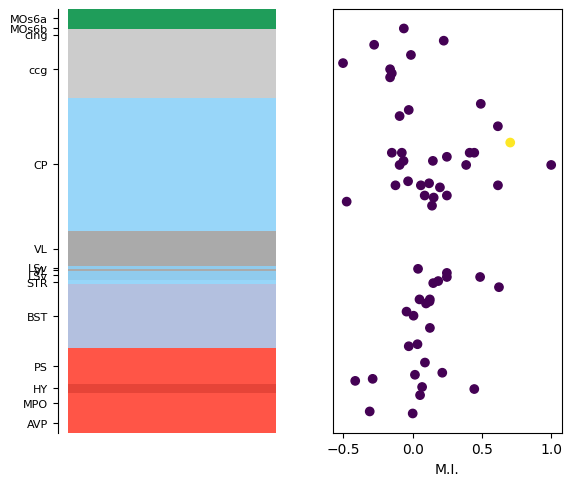

In [ ]:
#encodig of decision, cues, stimulus appear
#significant of respond to what
#stimulus cells, decision cells, reward cells. cues
#mix selectivity
#each cell have a propotion to different
#signal of noise ratio
#plot when insertion = 10
# ---------------------------------------------------
# Plot the modulation index for each unit across brain regions
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(6.5, 5.5)
# Plot the brain regions through which the channels on the insertion pass
plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'], ax=axs[0])
# Plot scatter plot of cluster depths vs cluster modulation index
axs[1].scatter(modulation_index, clusters_g['depths'], c=p_sig)  # color by significance
axs[1].set_xlabel('M.I.')
axs[1].get_yaxis().set_visible(False)
#to do: are we finding cluster with high level of significance?

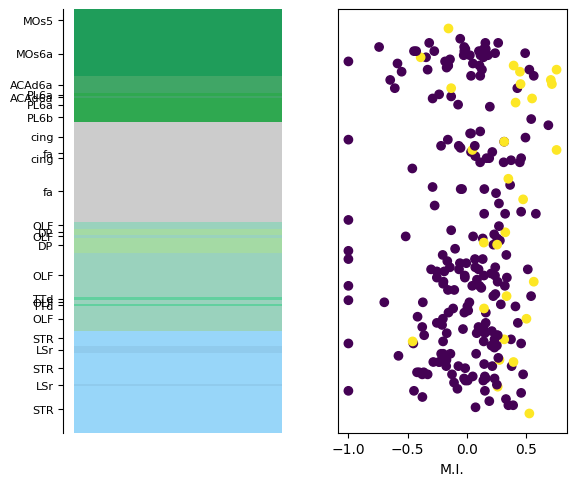

In [ ]:
#plot when insertion = 43
# ---------------------------------------------------
# Plot the modulation index for each unit across brain regions
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(6.5, 5.5)
# Plot the brain regions through which the channels on the insertion pass
plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'], ax=axs[0])
# Plot scatter plot of cluster depths vs cluster modulation index
axs[1].scatter(modulation_index, clusters_g['depths'], c=p_sig)  # color by significance
axs[1].set_xlabel('M.I.')
axs[1].get_yaxis().set_visible(False)
#to do: are we finding cluster with high level of significance?

In [ ]:
#can try to see if units are also selective to left / right conditions _after_ the first move, or _after_ the stimulus onset for example.

In [ ]:
cluster_STR_IDs = np.array(STR_df['cluster_id'])#np.array([161, 386])

In [ ]:
# ---------------------------------------------------
# Create PSTHs
binsize = 0.01  # bin size [sec] for neural binning
time_window = [-0.150, 0]

for count, clu_id in enumerate(cluster_STR_IDs):

    # Find spikes for this cluster
    spk_indx = np.where(np.isin(spikes_g['clusters'], clu_id))
    spikes_unit = {key: val[spk_indx] for key, val in spikes_g.items()}

    # Compute raster
    raster, timestamps = get_event_aligned_raster(spikes_unit['times'], events, tbin=binsize, values=None,
                                                  epoch=time_window, bin=True)
    # Compute PSTH (return only the mean)
    psth_a, _ = get_psth(raster, trial_ids=indx_choice_a)
    psth_b, _ = get_psth(raster, trial_ids=indx_choice_b)

    # ------- Stack PSTHs -------
    # Init ; Here we create a M = n condition x n unit x n time bin and will concatenate it later
    if count == 0:
        nbin = len(timestamps)
        nunit = len(cluster_STR_IDs)
        stack_psth = np.empty((2, nunit, nbin))

    stack_psth[0, count, :] = psth_a
    stack_psth[1, count, :] = psth_b

/usr/local/lib/python3.10/dist-packages/brainbox/task/trials.py:196: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(raster, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


[Text(0, 0, 'unit #1')]

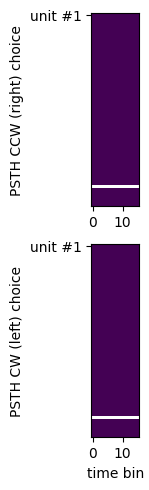

In [ ]:
# ---------------------------------------------------
# Plot stacked PSTHs
fig, ax = plt.subplots(2)
fig.set_size_inches(6.5, 5.5)
ax[0].imshow(stack_psth[0, :, :], vmax=stack_psth.max(), vmin=stack_psth.min())
ax[1].imshow(stack_psth[1, :, :], vmax=stack_psth.max(), vmin=stack_psth.min())
ax[0].set_xlabel('')
ax[1].set_xlabel('time bin')
ax[0].set_ylabel('PSTH CCW (right) choice')
ax[1].set_ylabel('PSTH CW (left) choice')

ytick_loc = [0]
ax[0].set_yticks(ytick_loc)
ax[1].set_yticks(ytick_loc)
ax[0].set_yticklabels(['unit #1'])
ax[1].set_yticklabels(['unit #1'])

In [ ]:
# ---------------------------------------------------
# Check that there are indeed only 2 values in choice
assert len(np.unique(choice)) == 2

# ---------------------------------------------------
# Use the spike count in the time window prior to the movement onset as predictors.
# We use the same time window as defined earlier (Encoding)
X = spike_count.T  # shape of spike_count : n units x n trials in set -> transpose to fit model
y = choice

# ---------------------------------------------------
# Split trials into test and training sets for the logistic regression.
# Take first half of trials for training, second half for testing (test_size = 0.5)
# Fix random seed to repeat results across runs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# ---------------------------------------------------
# See how many trials there is for choice +1 ; -1
print(f'Training set : {len(np.where(y_train == 1)[0])} choice +1 / {len(y_train)} trials')
print(f'Testing set : {len(np.where(y_test == 1)[0])} choice +1 / {len(y_test)} trials')

Training set : 270 choice +1 / 441 trials
Testing set : 280 choice +1 / 441 trials


In [ ]:
# ---------------------------------------------------
# Fit the logistic regression model
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# Use the test set to assess the model accuracy
choice_predicted = clf.predict(X_test)
n_trial_correct = len(np.where(y_test == choice_predicted)[0])
print(f'Accuracy : {n_trial_correct} trials correctly predicted / {len(y_test)} trials')
acc = n_trial_correct/len(y_test)
print(f'Accracy score : {acc}')

Accuracy : 287 trials correctly predicted / 441 trials
Accracy score : 0.6507936507936508


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
